# <center> Study on the competitivity of top league </center>

## Intro

I find myself dedicating an excessive amount of time to Reddit, specifically on the r/soccer subreddit. This platform predominantly consists of American and British users, with the Premier League (English League) being the most popularly discussed. Historically, the Spanish Liga (Spanish League) was regarded as the world's premier soccer league. It was a common refrain that, while La Liga might have been technically superior, the Premier League was "more competitive."

The notion was that in La Liga, the title race often boiled down to Real Madrid and Barcelona, whereas in the Premier League it was more varied. It was argued that, though the top teams in the Premier League might not be as dominant, the overall level of competition was more evenly distributed among the teams. That

In the present day, the Premier League holds the mantle of the world's best league. However, the perception of it being the "most competitive" still persists, which can be frustrating. This sentiment often seems to be based on subjective feelings rather than a concrete analysis, especially from individuals who primarily follow just one league. This led me to ponder whether we could use mathematical measures to objectively demonstrate the level of competitiveness in soccer leagues.

## Competitive Level

To quantitatively assess the relative competitiveness between two leagues, one initial approach involves comparing the count of distinct teams that have secured victory within a specified time frame, such as a decade.

However, this singular metric may prove insufficient. For instance, a league in which one team prevails 9 times and another achieves victory once would yield the same count of unique winners as a league in which two teams each secured 5 wins. Nevertheless, the latter scenario is widely regarded as more competitive.

An enhanced statistical metric could involve examining the average number of victories attained by the league-winning teams. In the latter example, this would result in an average of 5 wins for both cases. Despite this refinement, there may still be room for improvement. Incorporating the concept of standard deviation into the analysis could offer further insight:

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mat

In [4]:
LeagueA = [9,1]
LeagueB = [5,5]
print (np.std(LeagueA))
print (np.std(LeagueB))

4.0
0.0


Standard deviation seems to be a valuable metric to track. But now let's consider a scenario where a third league (League C) has ten teams that each secure a single victory. 

This League C is the most competitive a league can be. In this scenario, the standard deviation would be zero, meaning using only Standard deviation we would have no way to distinguish between League C and League B.

But the League C will exhibit a lower mean compared to League B. Combining the standard deviation and the mean could potentially serve as a composite metric, though it may not offer a perfect solution. A lower resulting value would suggest a greater number of unique winning teams and a more balanced allocation of victories. This combined metric could potentially yield valuable insights into the competitive landscape of the leagues in question. 

Let's try it on a few example : 

In [5]:
LeagueC=[1]*10
print ("League A Competitive Level :",np.std(LeagueA)+ np.mean(LeagueA))
print ("League B Competitive Level :",np.std(LeagueB)+ np.mean(LeagueB))
print ("League C Competitive Level :",np.std(LeagueC)+ np.mean(LeagueC))

League A Competitive Level : 9.0
League B Competitive Level : 5.0
League C Competitive Level : 1.0


This looks promising. We will refer to this metric as the "competitivity level." A lower competitivity level indicate a more competitive league.

But a league's competitiveness isn't solely determined by the winner of the trophy, but also by those contending for top European positions and the teams facing relegation. 

Using the mean of points earned during a season for the entire league wouldn't provide meaningful insights in this scenario, as it would be only influenced by the number of draws (which contribute only 2 points compared to 3 for a win).

On the other hand, the standard deviation of points earned per game for the entire league would serve as a robust indicator. A lower standard deviation would suggest closer competition among the teams.

Thus we will calculate :

-Competitive level of winner

-Competitive level of top 6

-Standard deviation of point per game across the league

This approach will allow us to determine which league exhibited the highest level of competitiveness in the last decade and assess whether any biases or overestimations are warranted.

Now that we've established our overarching approach, it's imperative to delve into specific considerations when conducting cross-league comparisons. For instance, it's prudent to exclude the anomalous COVID-19 affected year from our analysis. This is crucial due to the varying impacts it had on different leagues, such as the definitive stoppage of play in leagues like Ligue 1, as opposed to others that resumed under altered circumstances. We will still take 10 years for each league (The last 11 Years minus covid one)

Additionally, we must address the discrepancy in team counts across leagues. Not all leagues adhere to the same format; some comprise 20 teams, while others consist of 18. Furthermore, there are variations in relegation systems, with some leagues employing 2 relegations, while others employ 3, among other permutations.

It's worth noting that these nuances don't pose much of an issue for metrics like the competitive level, as they exclusively pertain to the top 1 and top 6 teams. Similarly, the standard deviation of points per game across the league is calculated on a per-game basis, rendering league size variations fairly irrelevant in this context. Still it's obvious that too much discrepency (like a league with 10 team) will obviously have an effect on competitive level of top 6 for example, so we will keep and eye out for those outlier.

## Data gathering : scraping of transfert market


In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [33]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/laliga/tabelle/wettbewerb/ES1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Liga = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,"League" :"Liga","Season": SeasonList})
Liga


,Team,Standing,Points,Matchs,League,Season
0,Barcelone,1,100,38,Liga,2012
1,Real Madrid,2,85,38,Liga,2012
2,Atlético Madrid,3,76,38,Liga,2012
3,Real Sociedad,4,66,38,Liga,2012
4,FC Valencia,5,65,38,Liga,2012
5,Málaga CF,6,57,38,Liga,2012
6,Real Betis,7,56,38,Liga,2012
7,Rayo Vallecano,8,53,38,Liga,2012
8,FC Sevilla,9,50,38,Liga,2012
9,FC Getafe,10,47,38,Liga,2012


In [36]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/premier-league/tabelle/wettbewerb/GB1/saison_id/20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Epl = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList, 'League': 'Epl',"Season": SeasonList})
Epl


,Team,Standing,Points,Matchs,League,Season
0,Manchester Utd.,1,89,38,Epl,2012
1,Manchester City,2,78,38,Epl,2012
2,Chelsea,3,75,38,Epl,2012
3,Arsenal,4,73,38,Epl,2012
4,Tottenham,5,72,38,Epl,2012
5,FC Everton,6,63,38,Epl,2012
6,Liverpool,7,61,38,Epl,2012
7,West Brom,8,49,38,Epl,2012
8,Swansea City,9,46,38,Epl,2012
9,West Ham Utd.,10,46,38,Epl,2012


In [37]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/serie-a/tabelle/wettbewerb/IT1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Seriea = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Seriea',"Season": SeasonList})
Seriea

,Team,Standing,Points,Matchs,League,Season
0,Juventus Turin,1,87,38,Seriea,2012
1,Napoli,2,78,38,Seriea,2012
2,AC Milan,3,72,38,Seriea,2012
3,Fiorentina,4,70,38,Seriea,2012
4,Udinese,5,66,38,Seriea,2012
5,AS Roma,6,62,38,Seriea,2012
6,Lazio Rome,7,61,38,Seriea,2012
7,Catania Calcio,8,56,38,Seriea,2012
8,Inter,9,54,38,Seriea,2012
9,Parma,10,49,38,Seriea,2012


In [38]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/bundesliga/tabelle/wettbewerb/L1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Bdsl = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Bdsl',"Season": SeasonList})
Bdsl

,Team,Standing,Points,Matchs,League,Season
0,Bayern Munich,1,91,34,Bdsl,2012
1,Bor. Dortmund,2,66,34,Bdsl,2012
2,B. Leverkusen,3,65,34,Bdsl,2012
3,FC Schalke 04,4,55,34,Bdsl,2012
4,SC Fribourg,5,51,34,Bdsl,2012
5,E. Francfort,6,51,34,Bdsl,2012
6,Hamburger SV,7,48,34,Bdsl,2012
7,Bor. M'gladbach,8,47,34,Bdsl,2012
8,Hannover 96,9,45,34,Bdsl,2012
9,1.FC Nürnberg,10,44,34,Bdsl,2012


In [39]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/ligue-1/tabelle/wettbewerb/FR1/saison_id/20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
L1 = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'L1',"Season": SeasonList})
L1

,Team,Standing,Points,Matchs,League,Season
0,Paris SG,1,83,38,L1,2012
1,Marseille,2,71,38,L1,2012
2,Ol. Lyonnais,3,67,38,L1,2012
3,OGC Nice,4,64,38,L1,2012
4,Saint-Étienne,5,63,38,L1,2012
5,LOSC Lille,6,62,38,L1,2012
6,G. Bordeaux,7,55,38,L1,2012
7,FC Lorient,8,53,38,L1,2012
8,Montpellier,9,52,38,L1,2012
9,Toulouse,10,51,38,L1,2012


In [42]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/eredivisie/tabelle/wettbewerb/NL1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Eredi = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Eredi',"Season": SeasonList})
Eredi

,Team,Standing,Points,Matchs,League,Season
0,Ajax,1,76,34,Eredi,2012
1,PSV Eindhoven,2,69,34,Eredi,2012
2,Feyenoord,3,69,34,Eredi,2012
3,Vitesse,4,64,34,Eredi,2012
4,FC Utrecht,5,63,34,Eredi,2012
5,FC Twente,6,62,34,Eredi,2012
6,FC Groningen,7,43,34,Eredi,2012
7,Heerenveen,8,42,34,Eredi,2012
8,ADO Den Haag,9,40,34,Eredi,2012
9,AZ Alkmaar,10,39,34,Eredi,2012


In [141]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (11,22):
    if i!=19:
        page="https://www.transfermarkt.fr/campeonato-brasileiro-serie-a/tabelle/wettbewerb/BRA1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Bra = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Bra',"Season": SeasonList})
Bra

,Team,Standing,Points,Matchs,League,Season
0,Fluminense,1,77,38,Bra,2011
1,Atlético-MG,2,72,38,Bra,2011
2,Grêmio,3,71,38,Bra,2011
3,FC São Paulo,4,66,38,Bra,2011
4,Vasco da Gama,5,58,38,Bra,2011
5,Corinthians,6,57,38,Bra,2011
6,Botafogo,7,55,38,Bra,2011
7,Santos,8,53,38,Bra,2011
8,Cruzeiro,9,52,38,Bra,2011
9,Internacional,10,52,38,Bra,2011


In [46]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/super-lig/tabelle/wettbewerb/TR1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Turk = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Turk',"Season": SeasonList})
Turk

,Team,Standing,Points,Matchs,League,Season
0,Galatasaray,1,71,34,Turk,2012
1,Fenerbahçe,2,61,34,Turk,2012
2,Besiktas,3,58,34,Turk,2012
3,Bursaspor,4,55,34,Turk,2012
4,Kayserispor,5,52,34,Turk,2012
5,Kasimpasa,6,50,34,Turk,2012
6,Antalyaspor,7,47,34,Turk,2012
7,Eskisehirspor,8,46,34,Turk,2012
8,Trabzonspor,9,46,34,Turk,2012
9,Gaziantepspor,10,46,34,Turk,2012


In [48]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/liga-portugal/tabelle/wettbewerb/PO1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Port = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Port',"Season": SeasonList})
Port

,Team,Standing,Points,Matchs,League,Season
0,FC Porto,1,78,30,Port,2012
1,Benfica,2,77,30,Port,2012
2,Paços Ferreira,3,54,30,Port,2012
3,SC Braga,4,52,30,Port,2012
4,Estoril Praia,5,45,30,Port,2012
5,Sporting CP,6,42,30,Port,2012
6,Rio Ave,7,42,30,Port,2012
7,Nacional,8,40,30,Port,2012
8,Vit. Guimarães,9,40,30,Port,2012
9,Marítimo,10,38,30,Port,2012


Egypt presents a unique scenario, as the initial two years of our analysis featured a league that was divided into two parts. Therefore, we excluded these initial two years from our analytical process.

In [52]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (14,23):
    if i!=19:
        page="https://www.transfermarkt.fr/egyptian-premier-league/tabelle/wettbewerb/EGY1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Egypt = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Egypt',"Season": SeasonList})
Egypt

,Team,Standing,Points,Matchs,League,Season
0,Zamalek,1,87,38,Egypt,2014
1,El Ahly,2,79,38,Egypt,2014
2,Enppi SC,3,70,38,Egypt,2014
3,El Makasa,4,64,38,Egypt,2014
4,Wadi Degla,5,57,38,Egypt,2014
5,El Mokawloon,6,55,38,Egypt,2014
6,Ismaily,7,55,38,Egypt,2014
7,Harras Hodoud,8,52,38,Egypt,2014
8,Gaish,9,52,38,Egypt,2014
9,Smouha,10,51,38,Egypt,2014


In [79]:
All_league = pd.concat([Liga,Epl,Seriea,L1,Bra,Turk,Eredi,Bdsl,Port,Egypt])



League_list=['Liga','Epl','Seriea','L1','Bra','Turk','Eredi','Bdsl','Port','Egypt']
Value_list=['Unique Winner', 'Complvl Winner', 'Unique Top 6', 'Complvl Top 6', 'Std All']
All_league

,Team,Standing,Points,Matchs,League,Season
0,Barcelone,1,100,38,Liga,2012
1,Real Madrid,2,85,38,Liga,2012
2,Atlético Madrid,3,76,38,Liga,2012
3,Real Sociedad,4,66,38,Liga,2012
4,FC Valencia,5,65,38,Liga,2012
5,Málaga CF,6,57,38,Liga,2012
6,Real Betis,7,56,38,Liga,2012
7,Rayo Vallecano,8,53,38,Liga,2012
8,FC Sevilla,9,50,38,Liga,2012
9,FC Getafe,10,47,38,Liga,2012


## Calculating Key Indicators

In [142]:
Unique_winner=[]
Complvl_winner=[]
for i in range(0,10):
    Mask_wnr=(All_league['Standing']==1) & (All_league['League']==League_list[i])
    Unique_winner.append(len(All_league[Mask_wnr].groupby('Team').count()))
    Complvl_winner.append(((np.std(All_league[Mask_wnr].groupby('Team').count(),axis=0)+np.mean(All_league[Mask_wnr].groupby('Team').count())).drop(['Points','Matchs','League','Season'])).to_numpy())
    Unique_winner[i]=float(Unique_winner[i])
    Complvl_winner[i]=float(Complvl_winner[i][0])
print(Unique_winner)
print(Complvl_winner)

[3.0, 4.0, 4.0, 3.0, 6.0, 4.0, 3.0, 1.0, 3.0, 2.0]
[5.21895141649746, 4.561552812808831, 5.098076211353316, 6.633164978870555, 2.4120226591665967, 4.1583123951777, 4.58055246225798, 10.0, 5.38813800098966, 5.0]


In [143]:
Unique_top6=[]
Complvl_top6=[]
for i in range(0,10):
    Mask_top6=(All_league['Standing']<7) & (All_league['League']==League_list[i])
    Unique_top6.append(len(All_league[Mask_top6].groupby('Team').count()))
    Complvl_top6.append(((np.std(All_league[Mask_top6].groupby('Team').count(),axis=0)+np.mean(All_league[Mask_top6].groupby('Team').count(),axis=0)).drop(['Points','Matchs','League','Season'])).to_numpy())
    Unique_top6[i]=float(Unique_top6[i])
    Complvl_top6[i]=float(Complvl_top6[i][0])
print(Unique_top6)
print(Complvl_top6)


[12.0, 12.0, 12.0, 12.0, 18.0, 17.0, 11.0, 15.0, 16.0, 12.0]
[8.366501646120692, 8.719318934070234, 8.3166247903554, 8.082207001484488, 5.24818754884601, 7.012440316020579, 9.229188998550308, 7.0550504633038935, 7.34687364248454, 6.23606797749979]


In [144]:
Std_all=[]

for i in range(0,10):
    temp=[]
    Mask_league=All_league['League']==League_list[i]
    Std_all.append(np.std(All_league[Mask_league]['Points']/All_league[Mask_league]['Matchs']))
    Std_all[i]=float(Std_all[i])
print(Std_all)

[0.4569541913189865, 0.47234452365881296, 0.48016011872310715, 0.41767922903305954, 0.33620300298536404, 0.40877587399726306, 0.4860164679658584, 0.4344010102271402, 0.5361616080109911, 0.4455158808134059]


To enhance comprehension, we'll first standardize the values. Subsequently, we'll invert the order, wherein 1 will denote the highest competitiveness and 0 the lowest. Finally, we'll compute the average of our three metrics: winner's competitiveness level, top competitiveness level, and the standard deviation of points per game. This approach ensures that even without prior knowledge of our methodology, viewers can swiftly grasp the graph.

In [145]:
Result= pd.DataFrame({'League':League_list,'Complvl Winner':Complvl_winner,'Complvl Top 6':Complvl_top6,'Std All':Std_all})
Value_list=['Complvl Winner','Complvl Top 6', 'Std All']
Standing=list(range(1,11,1))
#x-min/max-min

for i in range(0,len(Value_list)):  
    temp=pd.DataFrame(Result.sort_values(by=Value_list[i],ascending=True)['League'])
    temp[Value_list[i]+' Standing']=Standing
    Result=Result.merge(temp,on='League')
for i in range (0, len(Value_list)):
    min=np.min(Result[Value_list[i]])
    max=np.max(Result[Value_list[i]])
    temp=pd.DataFrame(np.abs((Result[Value_list[i]]-max)/(max-min)))
    Result[Value_list[i]+' Normalized']=temp
    
Result['Final Average Normalized']=Result.iloc[:,8:11].mean(axis=1)
temp=pd.DataFrame(Result.sort_values(by='Final Average Normalized',ascending=False)['League'])
temp['Final Average'+' Standing']=Standing
Result=Result.merge(temp,on='League')
Result['Leagueplot']=['LaLiga','Premier League','Serie A','Ligue 1','Brasileirão','SüperLig','Eredivise','Bundesliga','Liga Portugal','Egyptian Premier League']
Result


,League,Complvl Winner,Complvl Top 6,Std All,Complvl Winner Standing,Complvl Top 6 Standing,Std All Standing,Complvl Winner Normalized,Complvl Top 6 Normalized,Std All Normalized,Final Average Normalized,Final Average Standing,Leagueplot
0,Liga,5.218951,8.366502,0.456954,7,8,6,0.630082,0.216701,0.396119,0.306410,6,LaLiga
1,Epl,4.561553,8.719319,0.472345,3,9,7,0.716719,0.128076,0.319151,0.223614,9,Premier League
2,Seriea,5.098076,8.316625,0.480160,6,7,8,0.646012,0.229230,0.280065,0.254648,7,Serie A
3,L1,6.633165,8.082207,0.417679,9,6,3,0.443707,0.288114,0.592535,0.440324,5,Ligue 1
4,Bra,2.412023,5.248188,0.336203,1,1,1,1.000000,1.000000,1.000000,1.000000,1,Brasileirão
5,Turk,4.158312,7.012440,0.408776,2,3,2,0.769861,0.556832,0.637061,0.596946,3,SüperLig
6,Eredi,4.580552,9.229189,0.486016,4,10,9,0.714215,0.000000,0.250778,0.125389,10,Eredivise
7,Bdsl,10.000000,7.055050,0.434401,10,4,4,0.000000,0.546129,0.508908,0.527518,4,Bundesliga
8,Port,5.388138,7.346874,0.536162,8,5,10,0.607785,0.472825,0.000000,0.236412,8,Liga Portugal
9,Egypt,5.000000,6.236068,0.445516,5,2,5,0.658937,0.751851,0.453322,0.602587,2,Egyptian Premier League


## Visualizing Our Findings

In [146]:
import matplotlib.pyplot as plt


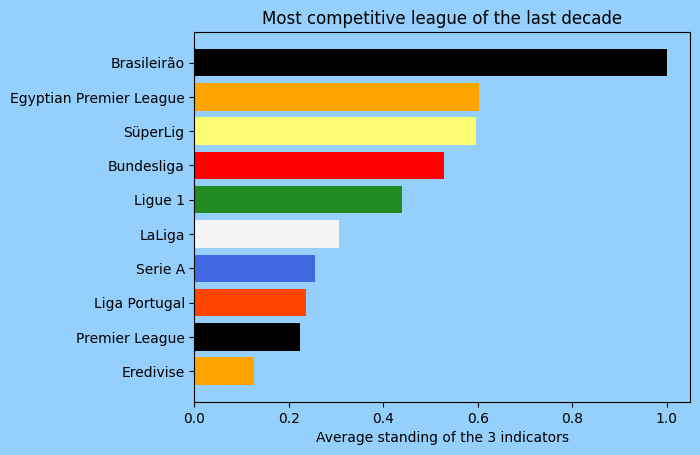

In [147]:
Result_plot=pd.DataFrame(Result.sort_values(by='Final Average Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Final Average Normalized'], label='Average Standing', align='center',color=['orange','black','orangered','royalblue','whitesmoke','forestgreen','red','xkcd:butter yellow'])
ax.set_title('Most competitive league of the last decade')
ax.set_xlabel('Average standing of the 3 indicators')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph1',bbox_inches='tight',dpi=300)
plt.show()

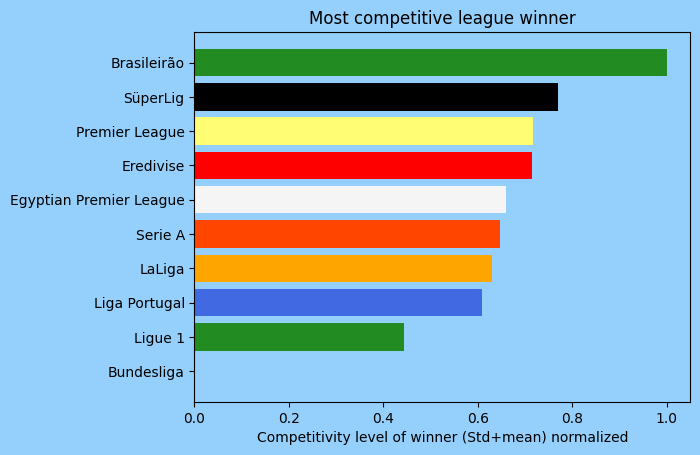

In [148]:
Result_plot=pd.DataFrame(Result.sort_values(by='Complvl Winner Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Complvl Winner Normalized'], label='Average Standing', align='center',color=['black','forestgreen','royalblue','orange','orangered','whitesmoke','red','xkcd:butter yellow'])
ax.set_title('Most competitive league winner')
ax.set_xlabel('Competitivity level of winner (Std+mean) normalized')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph2',bbox_inches='tight',dpi=300)
plt.show()

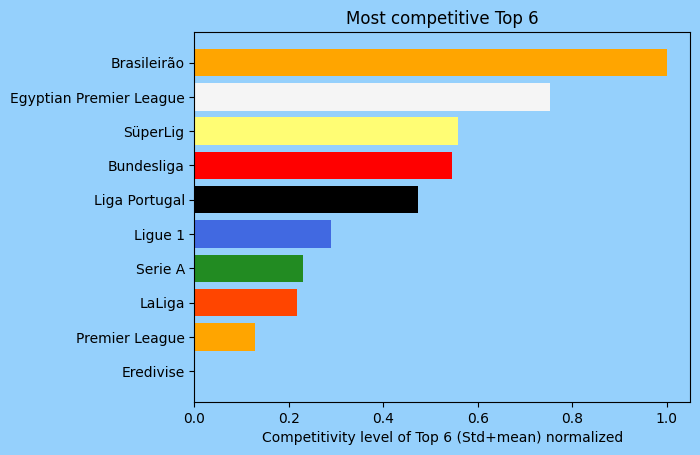

In [149]:
Result_plot=pd.DataFrame(Result.sort_values(by='Complvl Top 6 Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Complvl Top 6 Normalized'], label='Average Standing', align='center',color=['whitesmoke','orange','orangered','forestgreen','royalblue','black','red','xkcd:butter yellow'])
ax.set_title('Most competitive Top 6')
ax.set_xlabel('Competitivity level of Top 6 (Std+mean) normalized')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph3',bbox_inches='tight',dpi=300)
plt.show()

In [150]:
plt.get_backend()

'module://matplotlib_inline.backend_inline'

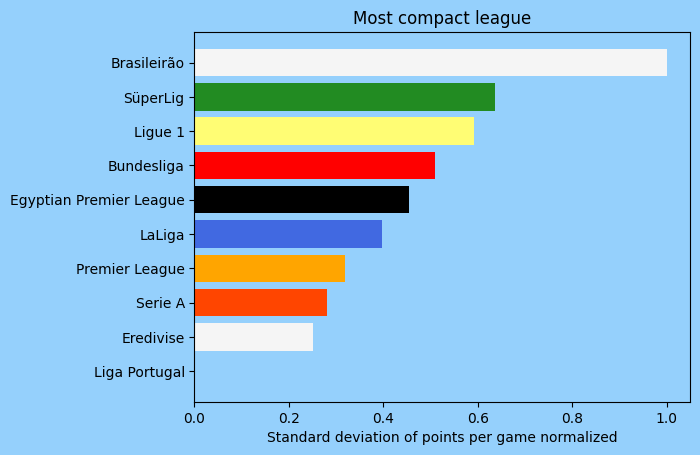

In [151]:
Result_plot=pd.DataFrame(Result.sort_values(by='Std All Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Std All Normalized'], label='Average Standing', align='center',color=['forestgreen','whitesmoke','orangered','orange','royalblue','black','red','xkcd:butter yellow'])
ax.set_title('Most compact league')
ax.set_xlabel('Standard deviation of points per game normalized')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph5',bbox_inches='tight',dpi=300)
plt.show()

## Conclusion

In summary, we observed that while Premier League enthusiasts often assert that their league is both the finest and the most fiercely contested, our analysis indicates otherwise. It's evident that the level of competition is not as high as claimed. The only metric where the Premier League stands out is in the diversity of winners. However, the predictability of the top 6 teams and the overall depth of the league fall short. If you seek a genuinely competitive league, the Brasileiro is evidently the superior choice, offering both high quality and intense competition.